In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user_data = pd.read_csv('user_data.csv', encoding='utf-8')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
logs = pd.read_csv('logs.csv', encoding='utf-8')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [ ]:
# EDA

logs.shape: (4500, 4)
____________________________________________________________________________________________________
client
int64
notNaN fraction - 1.0
notNaN - 4500
nunique - 4011
                    client    client
(60011.8, 70007.1]     535  0.118889
(70007.1, 80002.4]     463  0.102889
(30025.9, 40021.2]     463  0.102889
(50016.5, 60011.8]     462  0.102667
(89997.7, 99993.0]     452  0.100444
(10035.3, 20030.6]     452  0.100444
(80002.4, 89997.7]     442  0.098222
(20030.6, 30025.9]     428  0.095111
(40021.2, 50016.5]     405  0.090000
(-59.954, 10035.3]     398  0.088444


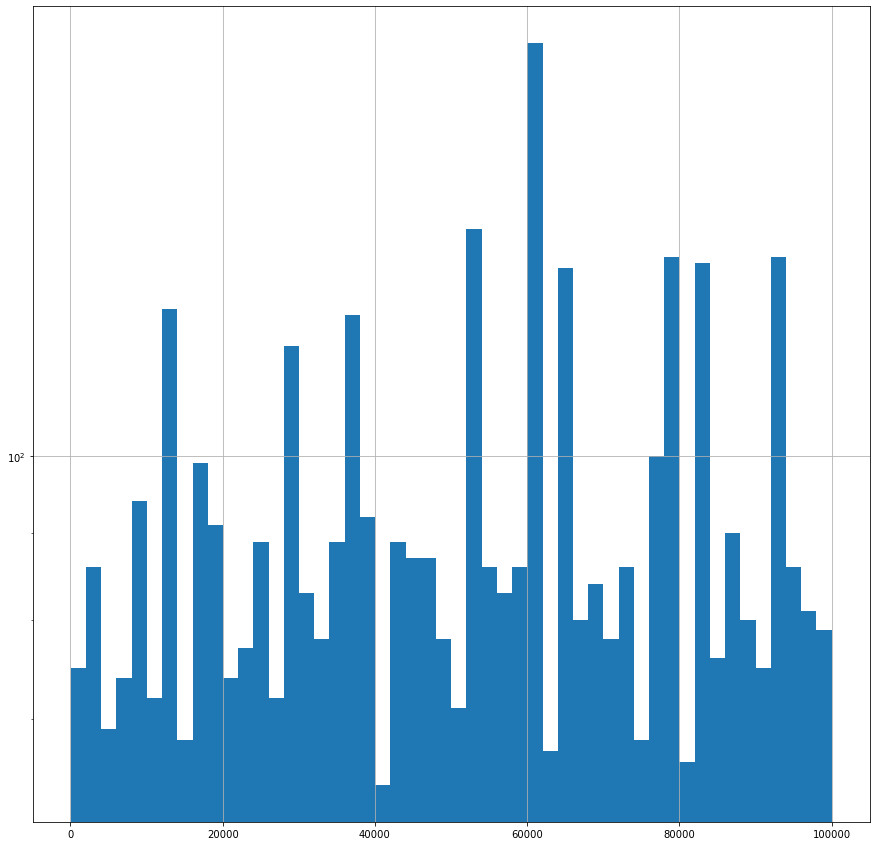

____________________________________________________________________________________________________
success
bool
notNaN fraction - 1.0
notNaN - 4500
nunique - 2
____________________________________________________________________________________________________
platform
object
notNaN fraction - 1.0
notNaN - 4500
nunique - 3
          platform  platform
phone         2753  0.611778
computer      1505  0.334444
tablet         242  0.053778
____________________________________________________________________________________________________
time
int64
notNaN fraction - 1.0
notNaN - 4500
nunique - 4376
                                    time      time
(1585471982.2, 1585479980.0]         483  0.107333
(1585431993.2, 1585439991.0]         466  0.103556
(1585447988.8, 1585455986.6]         459  0.102000
(1585407999.8, 1585415997.6]         458  0.101778
(1585455986.6, 1585463984.4]         451  0.100222
(1585463984.4, 1585471982.2]         445  0.098889
(1585415997.6, 1585423995.4]         

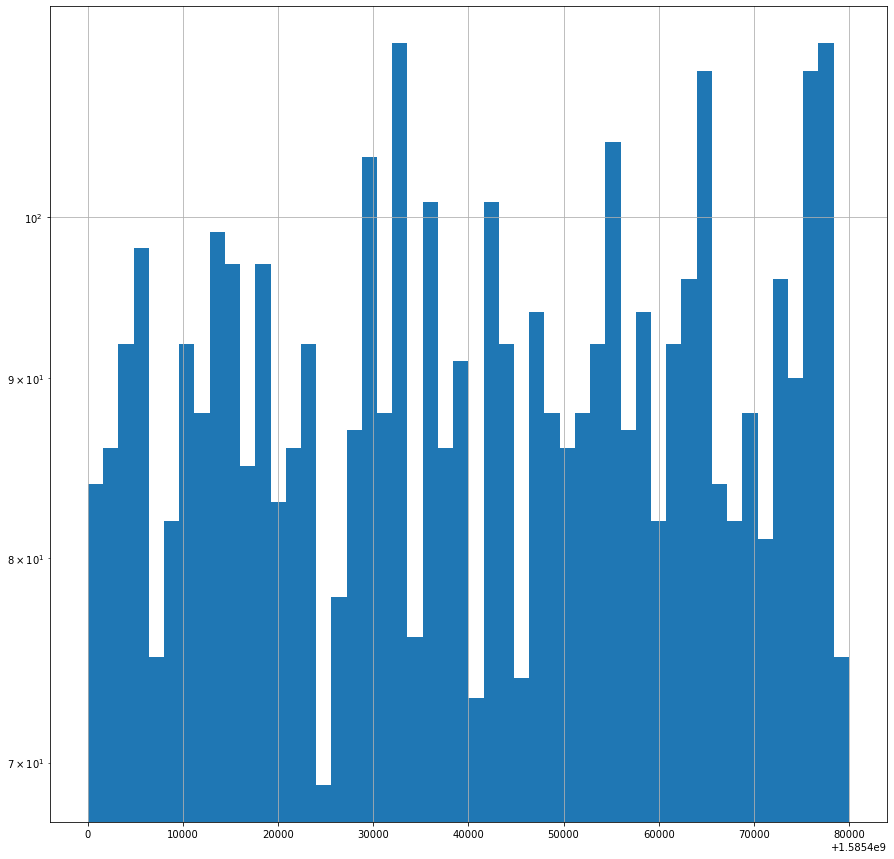

In [4]:
print(f'logs.shape: {logs.shape}')
for column in logs:
    print('_' * 100)
    print(column, 
          logs[column].dtypes, 
          f'notNaN fraction - {logs[column].notna().sum() / logs.shape[0]}', 
          f'notNaN - {logs[column].notna().sum()}', 
          f'nunique - {logs[column].nunique()}', 
          sep='\n')
    if logs[column].dtype == 'object':
        print(
            pd.concat(
                [logs[column].value_counts(), 
                 logs[column].value_counts(normalize=True)], 
                axis=1)
        )
    elif logs[column].dtype in ('float64', 'int64'):
        print(
            pd.concat(
                [logs[column].value_counts(bins=10), 
                 logs[column].value_counts(normalize=True, bins=10)], 
                axis=1)
        )
        logs[column].hist(bins=50, figsize=(15, 15), log=True)
        plt.show()
        # how to do print histogram next to table?

        
# how to do fraction among notNaN values?

In [5]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


user_data.shape: (2954, 3)
____________________________________________________________________________________________________
client
int64
notNaN fraction - 1.0
notNaN - 2954
nunique - 2954
                    client    client
(59999.8, 69993.1]     310  0.104942
(69993.1, 79986.4]     304  0.102911
(50006.5, 59999.8]     304  0.102911
(79986.4, 89979.7]     300  0.101557
(89979.7, 99973.0]     299  0.101219
(30019.9, 40013.2]     299  0.101219
(10033.3, 20026.6]     293  0.099188
(-59.934, 10033.3]     289  0.097833
(40013.2, 50006.5]     288  0.097495
(20026.6, 30019.9]     268  0.090724


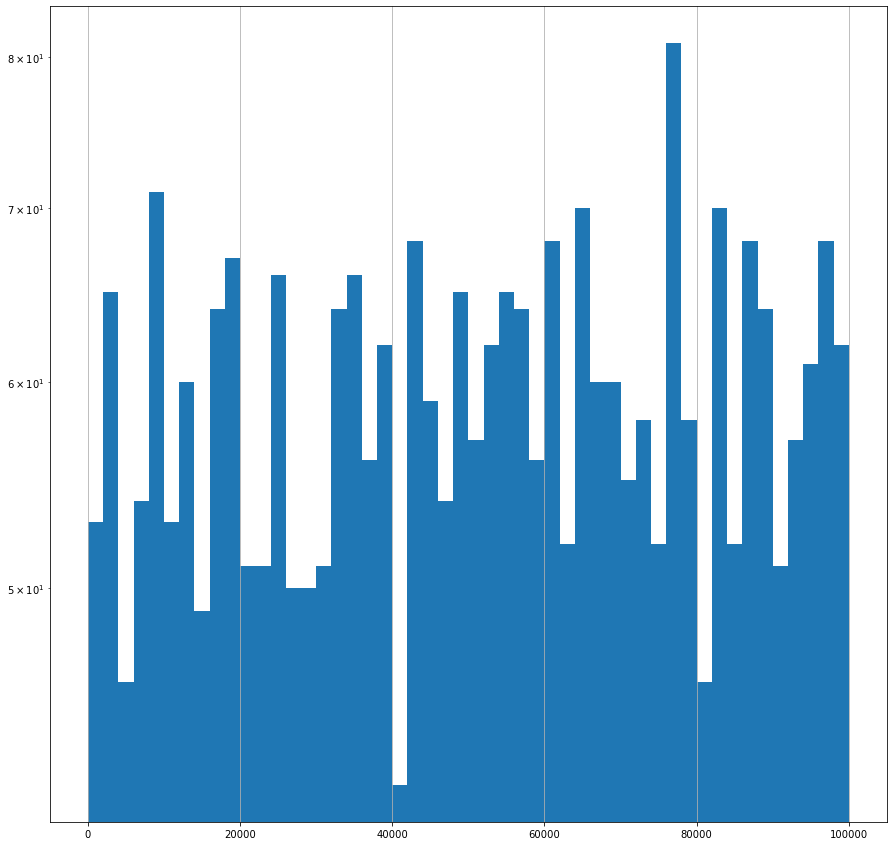

____________________________________________________________________________________________________
premium
bool
notNaN fraction - 1.0
notNaN - 2954
nunique - 2
       premium   premium
False     2548  0.862559
True       406  0.137441
____________________________________________________________________________________________________
age
int64
notNaN fraction - 1.0
notNaN - 2954
nunique - 50
               age       age
(24.9, 29.8]   334  0.113067
(44.5, 49.4]   322  0.109005
(34.7, 39.6]   320  0.108328
(39.6, 44.5]   311  0.105281
(64.1, 69.0]   293  0.099188
(49.4, 54.3]   283  0.095802
(29.8, 34.7]   279  0.094448
(54.3, 59.2]   278  0.094110
(59.2, 64.1]   267  0.090386
(19.95, 24.9]  267  0.090386


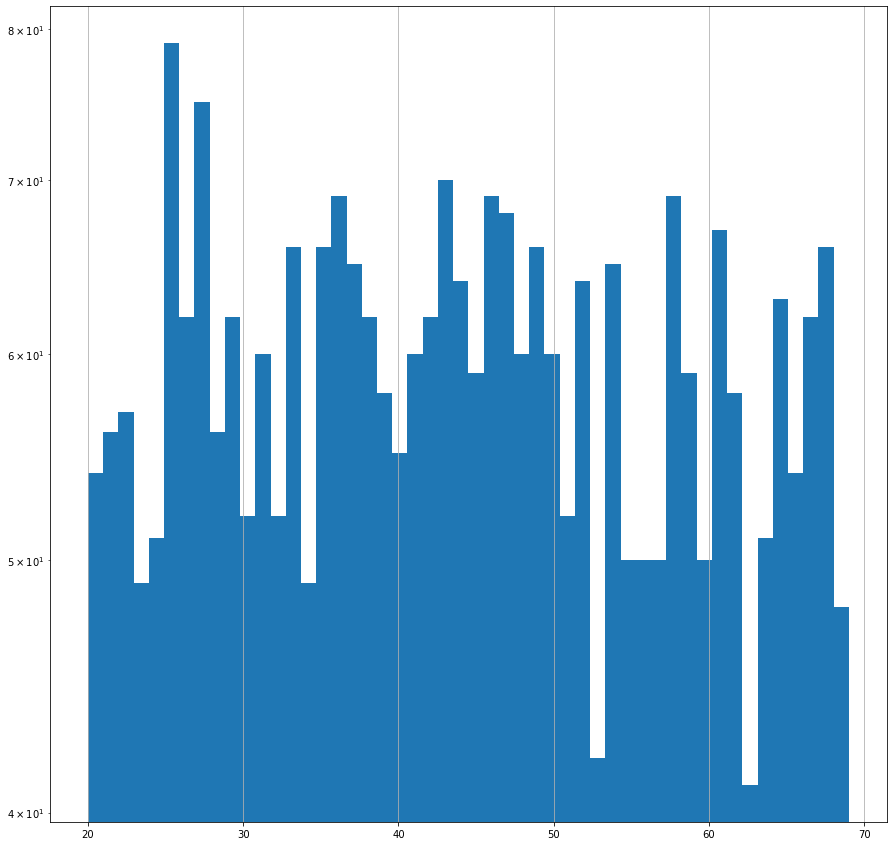

In [6]:
print(f'user_data.shape: {user_data.shape}')
for column in user_data:
    print('_' * 100)
    print(column, 
          user_data[column].dtypes, 
          f'notNaN fraction - {user_data[column].notna().sum() / user_data.shape[0]}', 
          f'notNaN - {user_data[column].notna().sum()}', 
          f'nunique - {user_data[column].nunique()}', 
          sep='\n')
    if user_data[column].dtype in ('object', 'bool'):
        print(
            pd.concat(
                [user_data[column].value_counts(), 
                 user_data[column].value_counts(normalize=True)], 
                axis=1)
        )
    elif user_data[column].dtype in ('float64', 'int64'):
        print(
            pd.concat(
                [user_data[column].value_counts(bins=10), 
                 user_data[column].value_counts(normalize=True, bins=10)], 
                axis=1)
        )
        user_data[column].hist(bins=50, figsize=(15, 15), log=True)
        plt.show()
        # how to do print histogram next to table?

        
# how to do fraction among notNaN values?

In [7]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [26]:
# 3.4.2

In [44]:
{sorted(
    logs
    .query("success == True")
    .groupby('client')
    .agg({'success':['count']})
    .sort_values(('success', 'count'), ascending=False)
    .head(9)
    .index)}

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [20]:
logs.groupby('client') \
    .agg({'success': 'sum'}) \
    .query('success == success.max()') \
    .sort_values('client') \
    .index \
    .tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
# 3.4.3

In [15]:
(logs
 .query('success == True')
 .platform
 .value_counts()
 .idxmax()
)

'phone'

In [ ]:
# 3.4.4

In [9]:
merged_data = user_data.merge(logs)
merged_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [25]:
merged_data.query("premium==True").platform.value_counts().idxmax()

'phone'

In [ ]:
# 3.4.5

<AxesSubplot:xlabel='age'>

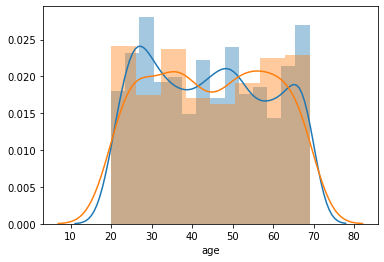

In [30]:
sns.distplot(merged_data.query("premium==False").age)
sns.distplot(merged_data.query("premium==True").age)

In [ ]:
# 3.4.6

In [49]:
(success_frequency = logs
                         .groupby('client', as_index=False)
                         .agg({'success': 'sum'})
                         .groupby('success', as_index=False)
                         .agg({'client': 'sum'})
)
success_frequency

,success,client
0,0.0,59126232
1,1.0,139796845
2,2.0,2253674
3,3.0,79320
4,40.0,64064
5,41.0,506370


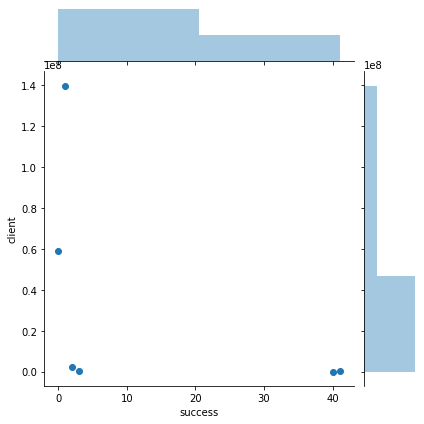

In [50]:
sns.jointplot(success_frequency.success, success_frequency.client);

In [ ]:
# 3.4.7

In [10]:
merged_data.query("success == True & platform == 'computer'")

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


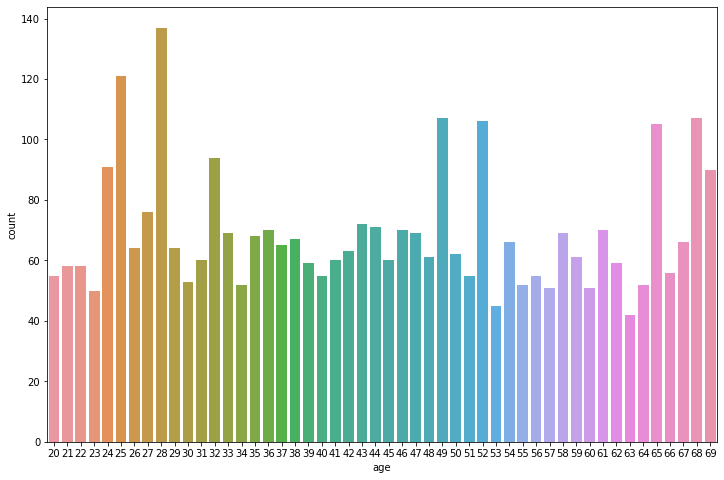

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=merged_data);